In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from arima_utility import *
from arima import ARIMA

In [2]:
p,d,q = 0,1,1

In [3]:
time_steps = 2000
times = range(time_steps)

In [4]:
print 'generating ARIMA('+str(p)+','+str(d)+','+str(q)+') time series'
np.random.seed(11)
z,phi,theta,sigma_a_sq = gen_arima_model(p,d,q,time_steps)

generating ARIMA(0,1,1) time series


In [5]:
print '======================================='
print 'printing parameters for genrated model:'
print '     this is sigma_a_sq '+str(sigma_a_sq)
if (p>0):
   print '     this is phi'
   print phi
if (q>0):
   print '     this is theta'
   print theta
print '======================================='


printing parameters for genrated model:
     this is sigma_a_sq 1.0
     this is theta
[0.24421575110141536]


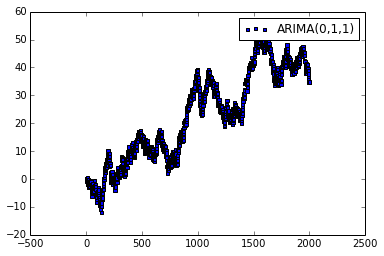

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(times,z,s=10,c='b',marker="s",label='ARIMA('+str(p)+','+str(d)+','+str(q)+')')
plt.legend(loc='best');
plt.show()

In [7]:
from  statsmodels.tsa import arima_model as am
if (d==0):
   #test with statsmodels
   model = am.ARMA(z,(p,q))
   result = model.fit(trend='c',method='mle',disp=-1)
   print 'parameters from statsmodels fitting for comparison'
   print result.params
else:
   #test with statsmodels
   model = am.ARIMA(z,(p,d,q))
   result = model.fit(trend='c',method='mle',disp=-1)
   print 'parameters from statsmodels fitting for comparison'
   print result.params

parameters from statsmodels fitting for comparison
[ 0.01732119 -0.2274331 ]


In [8]:
guess_sigma_a_sq = sigma_a_sq
if (p>0):
   guess_phi = phi #+ 0.01*np.random.random_sample(p)
   #guess_phi = result.params[1:1+p]
else:
   guess_phi = np.empty(0)
if (q>0):
   guess_theta = theta #+ 0.01*np.random.random_sample(q)
   #guess_theta = -1.0*result.params[1+p:]
else:
   guess_theta = np.empty(0)

In [9]:
model = ARIMA(p,d,q)
model.train(z,guess_phi,guess_theta,guess_sigma_a_sq)

print '======================================='
print 'printing parameters for fitted model:'
print '     this is sigma_a_sq '+str(model.sigma_a_sq)
if (p>0):
   print '     this is phi'
   print model.phi
if (q>0):
   print '     this is theta'
   print model.theta
print 'this was mu ',model.mu
print '======================================='

beginning minimization of negative of log-likelihood function
  1  2835.979641395784  26.878313917  Line Search Step
  2  2836.879580144938  51.538879431  Line Search Step
  3  2835.737050814819  12.9334431761  BFGS Step
  4  2835.661777270151  0.322259595446  BFGS Step
  5  2835.661710590405  0.155153479916  BFGS Step
  6  2835.661686728265  0.0182446189639  BFGS Step
  7  2835.661686537727  4.18039387334e-05  BFGS Step
  8  2835.661686537726  9.21838330582e-07  Optimization Converged
printing parameters for fitted model:
     this is sigma_a_sq 0.999176935916
     this is theta
[ 0.22743309]
this was mu  0.0173236974772


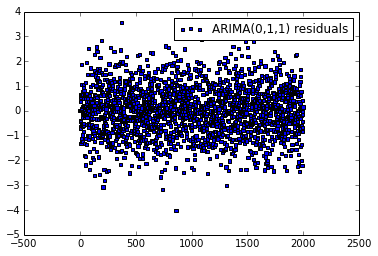

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(range(len(model.a_hat)),model.a_hat,s=10,c='b',marker="s",label='ARIMA('+str(p)+','+str(d)+','+str(q)+') residuals')
plt.legend(loc='best');
plt.show()

$P^{\mu \nu} = T^{\mu \cdot}_{\cdot i}  T^{\nu \cdot}_{\cdot i}$